In [97]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import pandas as pd
from collections import defaultdict

plt.rcParams['figure.figsize'] = (15, 12)

#%matplotlib notebook
%matplotlib inline

In [2]:
G = 6.67428e-11

# Simulator

## Classes

In [80]:
class Body:
    
    
    def __init__(self, name, mass, position, velocity):
        self.name = name
        self.mass = mass
        self.position = position
        
        self.tragectory = []
        
        self.velocity = velocity
        self.acceleation = np.array([0, 0 ,0], dtype='float64')
    
    
    def accelerate(self, other_bodies):
        
        self.acceleation = np.array([0, 0, 0], dtype='float64')
        
        for body in other_bodies:
            
            if (body.position == self.position).all():
                continue
                
            r = np.sqrt( np.sum( ( self.position - body.position ) ** 2 ) )
            
            print(r)
            
            tmp = G * body.mass / r**3
            
            print(tmp)
            
            self.acceleation += tmp * (body.position - self.position)
    
    
    def update_velocity(self, time_step = 1):
        self.velocity += self.acceleation * time_step
    
    
    def update_position(self, time_step = 1):
        self.tragectory.append( self.position.copy() )
        self.position += self.velocity * time_step

## Simulation

In [81]:
bodies = [
    Body("Sun", 2e30, np.array([0, 0, 0], dtype='float64'), np.array([0, 0, 0], dtype='float64')),
    Body("Earth", 6e24, np.array([0, 1.5e11, 0], dtype='float64'), np.array([30000, 0, 0], dtype='float64')),
]

In [ ]:
STEPS = 1000

for _ in range(STEPS):
    
    for body in bodies:
        body.accelerate(bodies)
        body.update_velocity(1000)
    
    for idx, body in enumerate(bodies):
        body.update_position(1000)

## Vizualization

In [218]:
def plot_output(bodies, outfile = None):
    
    fig = plt.figure()
    cmap = plt.get_cmap('viridis')
    ax = fig.add_subplot(1,1,1)
    
    max_range = 0
    
    for idx, (name, trajectory) in enumerate(bodies.items()): 
        max_dim = trajectory.max()
        
        if max_dim > max_range:
            max_range = max_dim
        
        ax.plot(trajectory[:, 0], trajectory[:, 1], c = cmap(idx/len(bodies)), label = name)        
    
    ax.scatter([0], [0], s=200)
    #ax.set_xlim([-max_range,max_range])    
    #ax.set_ylim([-max_range,max_range])
    #ax.set_zlim([-max_range,max_range])
    
    ax.legend()        
        
    if outfile:
        plot.savefig(outfile)
    else:
        plt.show()

In [234]:
def plot_output(bodies, outfile = None):
    
    fig = plt.figure()
    cmap = plt.get_cmap('viridis')
    ax = fig.add_subplot(1,1,1, projection='3d')
    
    max_range = 0
    
    for idx, (name, trajectory) in enumerate(bodies.items()): 
        max_dim = trajectory.max()
        
        if max_dim > max_range:
            max_range = max_dim
        
        ax.plot(trajectory[:, 0], trajectory[:, 1], c = cmap(idx/len(bodies)), label = name)        
    
    ax.scatter([0], [0], s=200)
    ax.set_xlim([-max_range,max_range])    
    ax.set_ylim([-max_range,max_range])
    ax.set_zlim([-max_range,max_range])
    
    ax.legend()        
        
    if outfile:
        plot.savefig(outfile)
    else:
        plt.show()

# Load data

In [45]:
def load_body_data(file_name, planet_name, num_points):
    
    data = []
    
    with open(file_name) as file:
        line = file.readline()
        while line:
            line = line.strip('\n')
            if line.split(",")[0] == planet_name:
                data.append(list(map(float, line.split(",")[1:])))
                
                if len(data) == num_points:
                    break
                    
            line = file.readline()
    
    return np.array(data)

In [46]:
modeled_data = load_body_data('two_bodies.csv', 'Mercury', 10000)

# Metrics

In [13]:
%matplotlib inline

In [184]:
def make_circle(radius, num_points):
    x = np.linspace(-radius, radius, num_points)
    y = np.sqrt(-x**2+radius**2)
    return np.array(list(zip(x.tolist()+x.tolist(), y.tolist()+((-1)*y).tolist())))

In [14]:
r1 = 100
r2 = 20

In [18]:
# Stupidest algorithm possible

closest_pairs = np.array(list(map(lambda x: [x, min(second_circle, key=lambda y: sum((x-y)**2))], first_circle)))

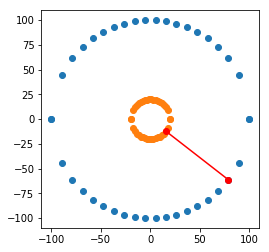

In [19]:
plt.scatter(first_circle[:, 0], first_circle[:, 1])
plt.scatter(second_circle[:, 0], second_circle[:, 1])
i=-3
plt.plot(closest_pairs[i,:,0],closest_pairs[i,:,1], 'ro-')
plt.gca().set_aspect('equal')

In [200]:
def dist(p1, p2):
    return np.sqrt(((p1-p2)**2).sum())

def get_relative_closeness(pred_fig, real_fig):
    
    closest_pairs = np.array(list(map(lambda x: [x, min(pred_fig, key=lambda y: sum((x-y)**2))], 
                                                                              real_fig)))
    scores = []
    
    for pair in closest_pairs:
        
        real_len = dist(pair[0], np.zeros(pair[0].shape[0]))
        pred_len = dist(pair[1], np.zeros(pair[0].shape[0]))
        scores.append( (real_len-pred_len)/real_len )
    
    return scores

# Empirical data

In [176]:
def find_possible_points(curr_point, curr_radius, velocity, next_radius, T):
        
    velocity*=curr_point[1] * -1
    D = ((curr_point[0]**2) * (((curr_radius**2)+velocity*T)**2) - 
                    ((curr_point[1]**2)+(curr_point[0]**2))*((((curr_radius**2)+velocity*T)**2) - (next_radius**2)*(curr_point[1]**2)))

    x1 = (curr_point[0]*((curr_radius**2)+velocity*T) + np.sqrt(D)) / ((curr_point[0]**2)+(curr_point[1]**2))
    x2 = (curr_point[0]*((curr_radius**2)+velocity*T) - np.sqrt(D)) / ((curr_point[0]**2)+(curr_point[1]**2))
    
    y1 = ((curr_radius**2) + velocity*T - curr_point[0]*x1) / curr_point[1]
    y2 = ((curr_radius**2) + velocity*T - curr_point[0]*x2) / curr_point[1]
    
    return np.array([x1, y1]), np.array([x2, y2])

In [196]:
def find_possible_points(curr_point, curr_radius, velocity, next_radius, T):
    
    x = curr_point[0]; y = curr_point[1]
    
    A = x
    B = y
    C = -curr_radius**2 - velocity*T*y
    
    div = A**2+B**2
    
    D = -(A*C) / div
    E = -(B*C) / div
    print((A*next_radius)**2 + (B*next_radius)**2 - C**2)
    F = B * np.sqrt((A*next_radius)**2 + (B*next_radius)**2 - C**2) / div
    G = A * np.sqrt((A*next_radius)**2 + (B*next_radius)**2 - C**2) / div
    
    x1 = D + F
    y1 = E - G
    x2 = D - F
    y2 = E + G
    
    return [x1, y1], [x2, y2]

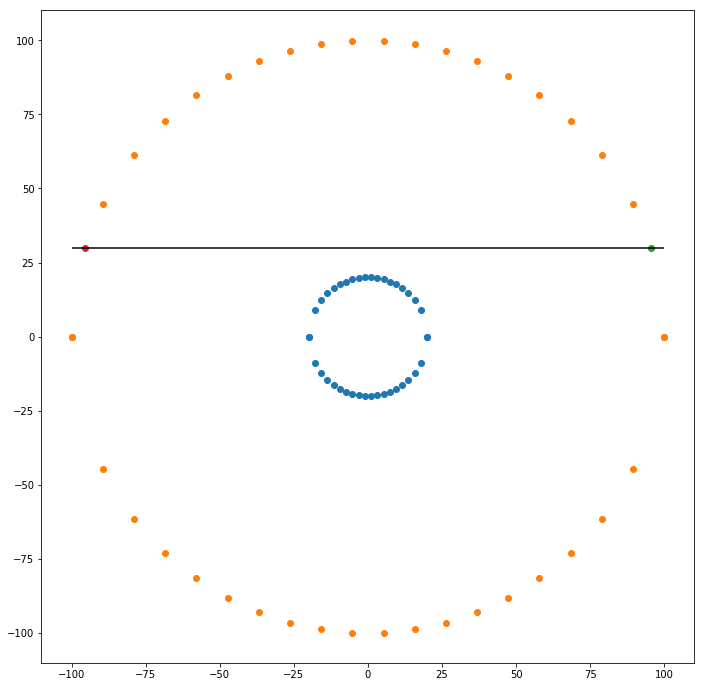

In [190]:
velocity = 10
T = 1
r1 = 20
r2 = 100

first_circle = make_circle(r1, 20)
second_circle = make_circle(r2, 20)

p1, p2 = find_possible_points([0, r1], r1, velocity, r2, T)

plt.scatter(first_circle[:, 0], first_circle[:, 1])
plt.scatter(second_circle[:, 0], second_circle[:, 1]) 
plt.scatter(p1[0], p1[1])
plt.scatter(p2[0], p2[1])
plt.hlines(r1+velocity, -r2, r2)

plt.gca().set_aspect('equal')

In [191]:
def point_is_left(trajectory_point, new_point):
    if trajectory_point[0] > 0 and trajectory_point[1] > 0:
        return new_point[0] < trajectory_point[0]
    if trajectory_point[0] < 0 and trajectory_point[1] >0:
        if new_point[1] < 0:
            return True
        else:
            return new_point[0] < trajectory_point[0]
    if trajectory_point[0] < 0 and trajectory_point[1] < 0:
        return new_point[0] > trajectory_point[0]
    if trajectory_point[0] > 0 and trajectory_point[1] < 0:
        if new_point[1] > 0:
            return True
        else:
            return new_point[0] > trajectory_point[0]

In [192]:
def build_trajectories(radiuses, radix_velocities, go_left=True):
    
    T = 60 * 60

    assert len(radiuses) == len(radix_velocities)
        
    coordinates = []
    
    #choose first point
    
    coordinates.append(np.array([0, radiuses[0]]))
    
    # Iterate over dots 
    
    for i in range(len(radiuses)):
        
        curr_point = coordinates[-1]
        curr_radius = radiuses[i]
        next_radius = radiuses[i+1 if i+1<len(radiuses) else 0]

        velocity = radix_velocities[i]
        
        j=0
        dist = next_radius - curr_radius
        while True:

            if velocity*T > dist:
                if j >= len(radix_velocities):
                    return coordinates
                velocity = radix_velocities[i+j if i+j < len(radix_velocities) else j]
                j+=1
            else:
                break
            
        # Find coordinates of intersections
        print(i)
        
        print(curr_radius, velocity, next_radius)
        print(np.abs(velocity * T), np.abs(next_radius - curr_radius))
        #if np.abs(velocity * T) <= np.abs(next_radius - curr_radius):
        points = find_possible_points(curr_point, curr_radius, velocity, next_radius, T)
        #else:
        #    print("HERE")
        #    points = get_intersection_points(next_radius, curr_point, np.abs(velocity)*T)
            
        print("Possible points: ", points)
        # Define which way to go
        
        first_left = point_is_left(curr_point, points[0])
        
        if go_left:
            if first_left:
                point = points[0]
            else:
                point = points[1]
        else:
            if first_left:
                point = points[1]
            else:
                point = points[0]
        
        print("Chose: ", point)
        
        #if np.isnan(point[0]):
        #    continue
            
        coordinates.append(point)
        
        
    return coordinates

In [198]:
raw_data = pd.read_excel("MovementData/Mercury4.xlsx", names=['dist', 'speed']).values * 1e3

In [ ]:
c = np.array(build_trajectories(raw_data[:, 0], raw_data[:, 1]))

In [151]:
69299621867.0 - 69308223749.0

-8601882.0

In [152]:
-2399.3271000000004 * 60 * 60

-8637577.56

In [197]:
find_possible_points([-6.29779376e+09, 6.90215015e+10], 69308223749.0, -2399.3271000000004, 69299621867.0 ,60*60)

-4.256738529125373e+34


/home/max/Libs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  
/home/max/Libs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


([nan, nan], [nan, nan])

In [556]:
np.sqrt((np.array([-6.29779376e+09, 6.90215015e+10])**2).sum())

69308223722.42703

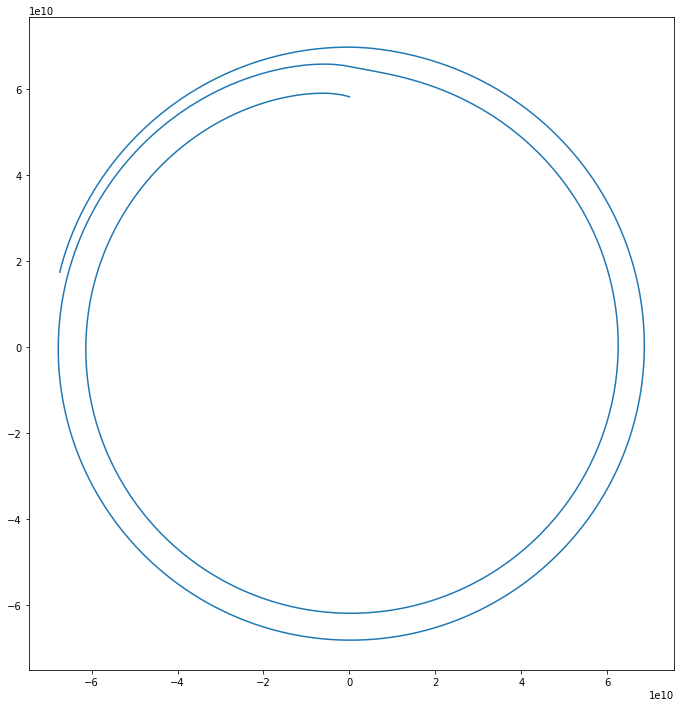

In [200]:
plt.plot(c[:, 0], c[:, 1])
plt.gca().set_aspect('equal')

In [306]:
def measure_quality(predicted_points, real_distances):
  
    predicted_distances = np.sqrt((predicted_points ** 2).sum(axis=-1))
    
    cur_real_idx = real_distances.argmin()
    min_pred_dist = predicted_distances.argmin()
    
    scores1 = []
    
    # Just set one way for iterating over trajectory
    
    pred_indexing = lambda idx: (min_pred_dist+idx) % len(predicted_points)
    real_indexing = lambda idx: idx % len(real_distances)
    
    for i in range(len(predicted_points)):
        
        curr_dist = predicted_distances[pred_indexing(i)]
        
        while (np.abs(real_distances[real_indexing(cur_real_idx+1)] - predicted_distances[pred_indexing(i)]) < 
                        np.abs(real_distances[real_indexing(cur_real_idx)] - predicted_distances[pred_indexing(i)])):
            cur_real_idx += 1
        
        scores1.append( (predicted_distances[pred_indexing(i)] - real_distances[real_indexing(cur_real_idx)]) /
                                          real_distances[real_indexing(cur_real_idx)])
    
    #################
    
    predicted_points = np.array(list(reversed(predicted_points)))
    real_distances = np.array(list(reversed(real_distances)))
    
    predicted_distances = np.sqrt((predicted_points ** 2).sum(axis=-1))
    
    cur_real_idx = real_distances.argmin()
    min_pred_dist = predicted_distances.argmin()
    
    scores2 = []
    
    # Just set one way for iterating over trajectory
    
    pred_indexing = lambda idx: (min_pred_dist+idx) % len(predicted_points)
    real_indexing = lambda idx: idx % len(real_distances)
    
    for i in range(len(predicted_points)):
        
        curr_dist = predicted_distances[pred_indexing(i)]
        
        while (np.abs(real_distances[real_indexing(cur_real_idx+1)] - predicted_distances[pred_indexing(i)]) < 
                        np.abs(real_distances[real_indexing(cur_real_idx)] - predicted_distances[pred_indexing(i)])):
            cur_real_idx += 1
        
        scores2.append( (predicted_distances[pred_indexing(i)] - real_distances[real_indexing(cur_real_idx)]) /
                                          real_distances[real_indexing(cur_real_idx)])
  
    
    return scores1, scores2

# Theoretical predictions

In [300]:
planet_data = pd.read_excel('PlanetData.xlsx')

In [90]:
planet_data

,Name,Mass,Velocity,Distance
0,Sun,1.988500e+30,-,-
1,Mercury,3.330220e+23,58980,46000000000
2,Venus,4.867500e+24,35260,107480000000
3,Earth,5.972600e+24,30290,147090000000
4,Mars,6.417100e+23,26500,206620000000
5,Jupiter,1.898600e+27,13720,740520000000
6,Saturn,5.684600e+26,10180,1352550000000
7,Uranus,8.683200e+25,7110,2741300000000
8,Neptune,1.024300e+26,5500,4444450000000


In [16]:
sun_mass = 1.988500e+30

In [17]:
def get_ellipse_points(sun_mass, body_mass, velocity, r):
   
    points = []
    
    for i in np.linspace(0, 2*np.pi, 100):
        rad = ((velocity*r) ** 2) / ( sun_mass * G * ( 1 + ( np.sqrt(1 + 2*(velocity*r/(G*sun_mass))**2 * ((velocity**2)/2 - G*sun_mass/r) ) ) * np.cos(i)) )
        x = np.cos(i)*rad
        y = np.sin(i)*rad
        points.append([x, y])
    
    return np.array(points)

# Comparing methods

In [99]:
plt.rcParams['figure.figsize'] = (15, 12)

In [117]:
def get_data_for_planet(planet_name, num_points):
    
    # Theory
    
    sun_mass = planet_data[planet_data.Name == 'Sun'].Mass.values[0]
    planet_mass = planet_data[planet_data.Name == planet_name].Mass.values[0]
    planet_speed = planet_data[planet_data.Name == planet_name].Velocity.values[0]
    planet_dist = planet_data[planet_data.Name == planet_name].Distance.values[0]
    
    p = get_ellipse_points(sun_mass, planet_mass, planet_speed, planet_dist)
    
    p = np.concatenate([p, np.zeros(p.shape[0]).reshape([p.shape[0], 1])], axis=1)
    
    # Modeling
    
    data = load_body_data('two_bodies.csv', planet_name, num_points)
    
    return {'Model':data, 'Theory':p}

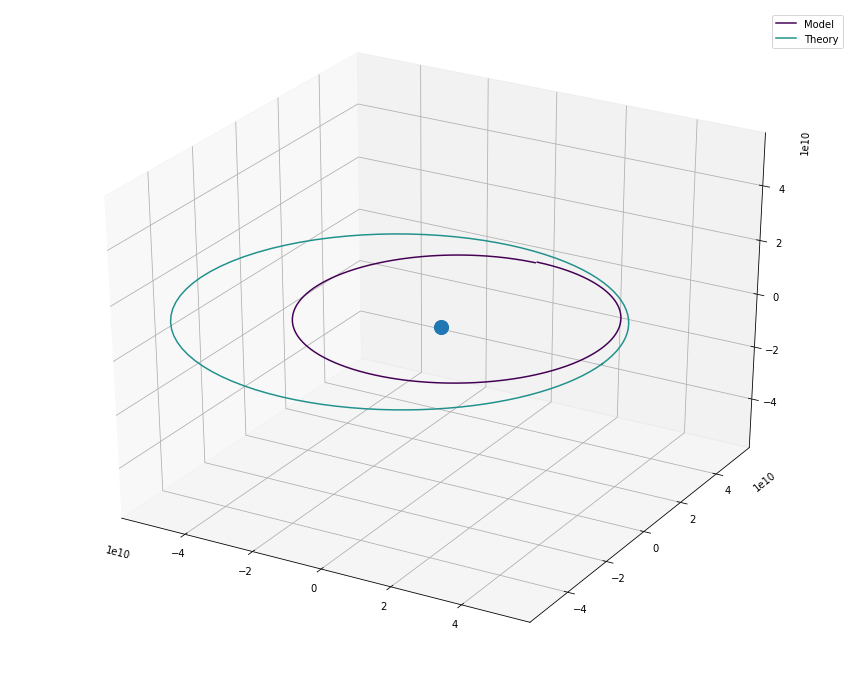

In [311]:
draw_data = get_data_for_planet('Mercury', num_points = 4605)

plot_output(draw_data)

In [312]:
planet_raw = pd.read_excel("MovementData/Mercury4.xlsx", names=['dist', 'speed']).values * 1e3

In [313]:
res1, res2 = measure_quality(draw_data['Theory'], planet_raw[:, 0])

th1 = np.abs(res1).mean()
th2 = np.abs(res2).mean()

res1, res2 = measure_quality(draw_data['Model'], planet_raw[:, 0])

mod1 = np.abs(res1).mean()
mod2 = np.abs(res2).mean()

print('Theory divergence: ', min([th1, th2]))
print('Model divergence: ', min([mod1, mod2]))

Theory divergence:  0.09218826745028035
Model divergence:  0.12058159566708451


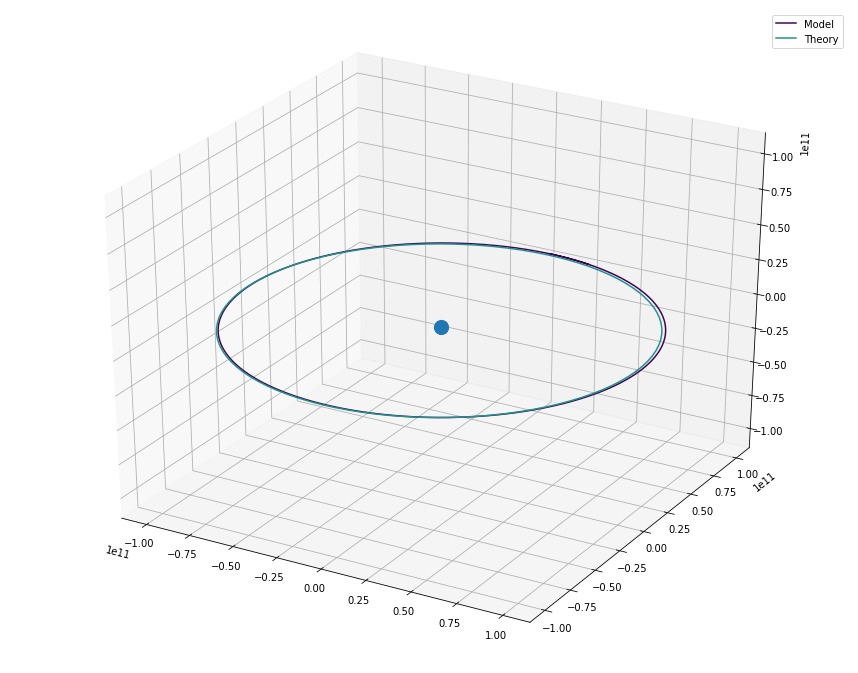

In [314]:
draw_data = get_data_for_planet('Venus', 20000)

plot_output(draw_data)

In [315]:
planet_raw = pd.read_excel("MovementData/venus4.xlsx", names=['dist', 'speed']).values * 1e3

In [316]:
res1, res2 = measure_quality(draw_data['Theory'], planet_raw[:, 0])

th1 = np.abs(res1).mean()
th2 = np.abs(res2).mean()

res1, res2 = measure_quality(draw_data['Model'], planet_raw[:, 0])

mod1 = np.abs(res1).mean()
mod2 = np.abs(res2).mean()

print('Theory divergence: ', min([th1, th2]))
print('Model divergence: ', min([mod1, mod2]))

Theory divergence:  1.306782764907822e-05
Model divergence:  0.003000093622522693


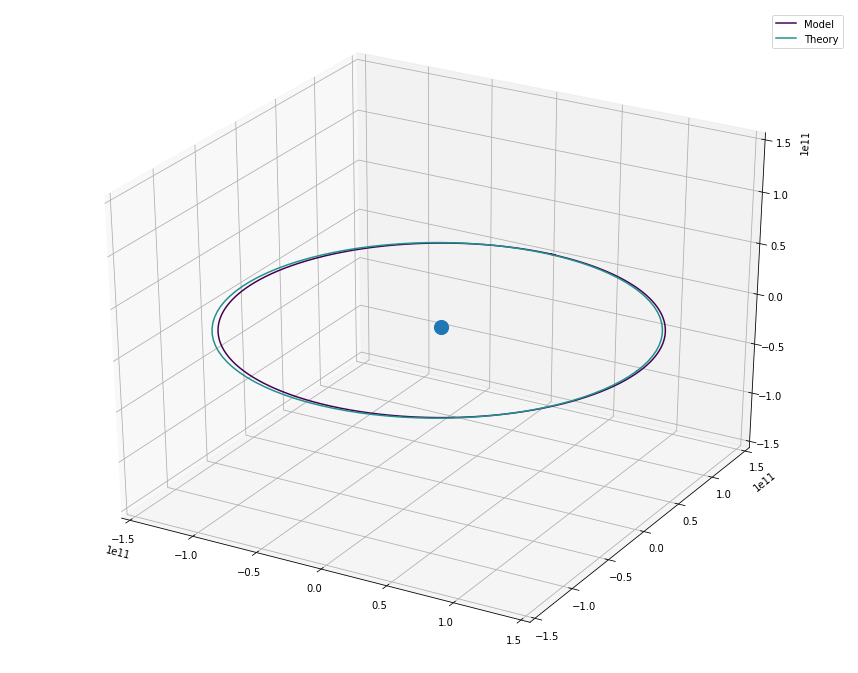

In [317]:
draw_data = get_data_for_planet('Earth', 31000)

plot_output(draw_data)

In [318]:
planet_raw = pd.read_excel("MovementData/earth4.xlsx", names=['dist', 'speed']).values * 1e3

In [319]:
res1, res2 = measure_quality(draw_data['Theory'], planet_raw[:, 0])

th1 = np.abs(res1).mean()
th2 = np.abs(res2).mean()

res1, res2 = measure_quality(draw_data['Model'], planet_raw[:, 0])

mod1 = np.abs(res1).mean()
mod2 = np.abs(res2).mean()

print('Theory divergence: ', min([th1, th2]))
print('Model divergence: ', min([mod1, mod2]))

Theory divergence:  1.6315027013334107e-05
Model divergence:  0.005357301311781715


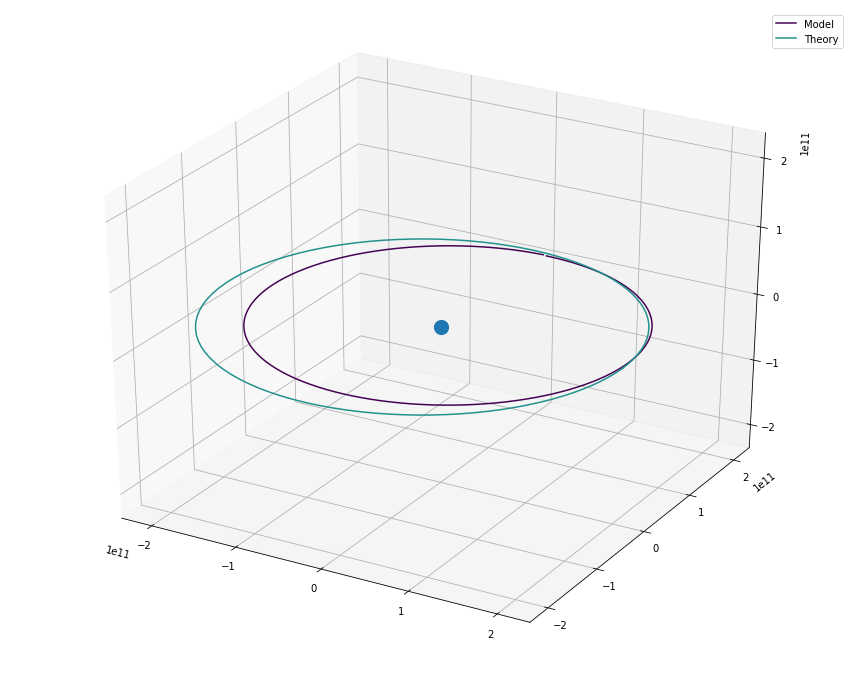

In [308]:
draw_data = get_data_for_planet('Mars', 50000)

plot_output(draw_data)

In [309]:
planet_raw = pd.read_excel("MovementData/mars4.xlsx", names=['dist', 'speed']).values * 1e3

In [310]:
res1, res2 = measure_quality(draw_data['Theory'], planet_raw[:, 0])

th1 = np.abs(res1).mean()
th2 = np.abs(res2).mean()

res1, res2 = measure_quality(draw_data['Model'], planet_raw[:, 0])

mod1 = np.abs(res1).mean()
mod2 = np.abs(res2).mean()

print('Theory divergence: ', min([th1, th2]))
print('Model divergence: ', min([mod1, mod2]))

Theory divergence:  0.038730538142028835
Model divergence:  0.045636291275357024


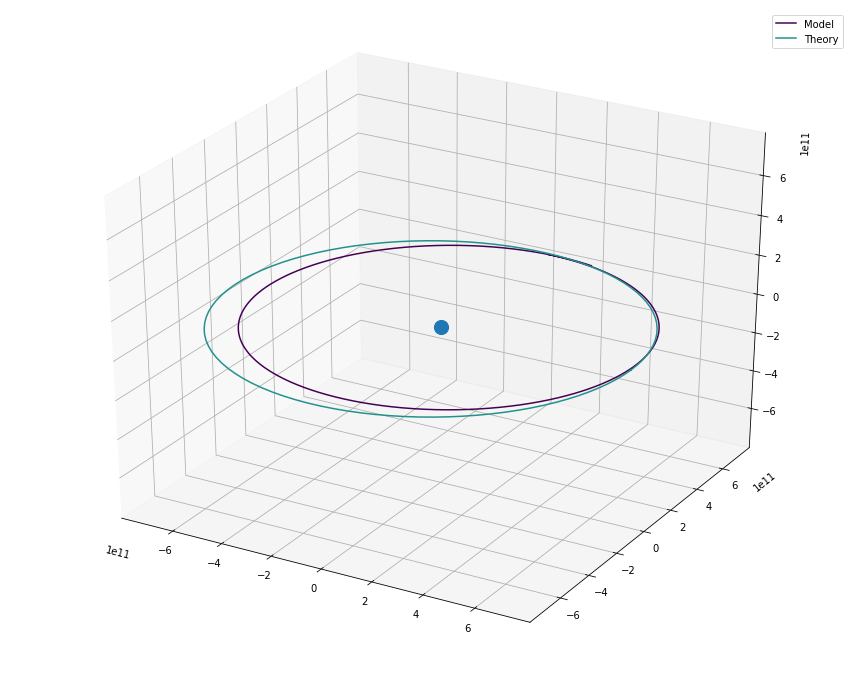

In [320]:
draw_data = get_data_for_planet('Jupiter', 350000)

plot_output(draw_data)

In [321]:
planet_raw = pd.read_excel("MovementData/jupiter4.xlsx", names=['dist', 'speed']).values * 1e3

In [322]:
res1, res2 = measure_quality(draw_data['Theory'], planet_raw[:, 0])

th1 = np.abs(res1).mean()
th2 = np.abs(res2).mean()

res1, res2 = measure_quality(draw_data['Model'], planet_raw[:, 0])

mod1 = np.abs(res1).mean()
mod2 = np.abs(res2).mean()

print('Theory divergence: ', min([th1, th2]))
print('Model divergence: ', min([mod1, mod2]))

Theory divergence:  0.023444615717603274
Model divergence:  0.03677497892886085


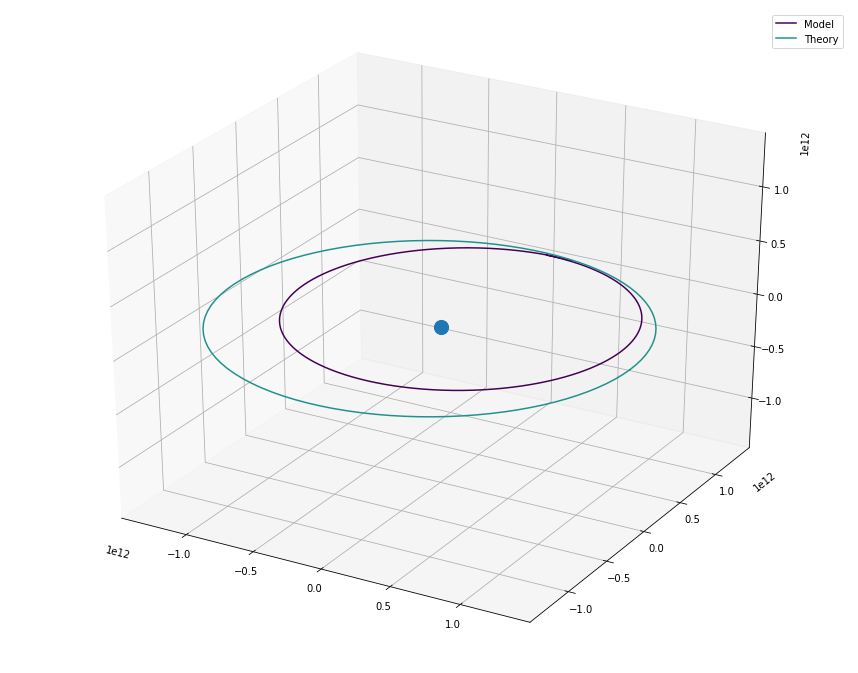

In [323]:
draw_data = get_data_for_planet('Saturn', 700000)

plot_output(draw_data)

In [324]:
planet_raw = pd.read_excel("MovementData/saturn4.xlsx", names=['dist', 'speed']).values * 1e3

In [325]:
res1, res2 = measure_quality(draw_data['Theory'], planet_raw[:, 0])

th1 = np.abs(res1).mean()
th2 = np.abs(res2).mean()

res1, res2 = measure_quality(draw_data['Model'], planet_raw[:, 0])

mod1 = np.abs(res1).mean()
mod2 = np.abs(res2).mean()

print('Theory divergence: ', min([th1, th2]))
print('Model divergence: ', min([mod1, mod2]))

Theory divergence:  0.0004441635991895567
Model divergence:  0.13520260042695498


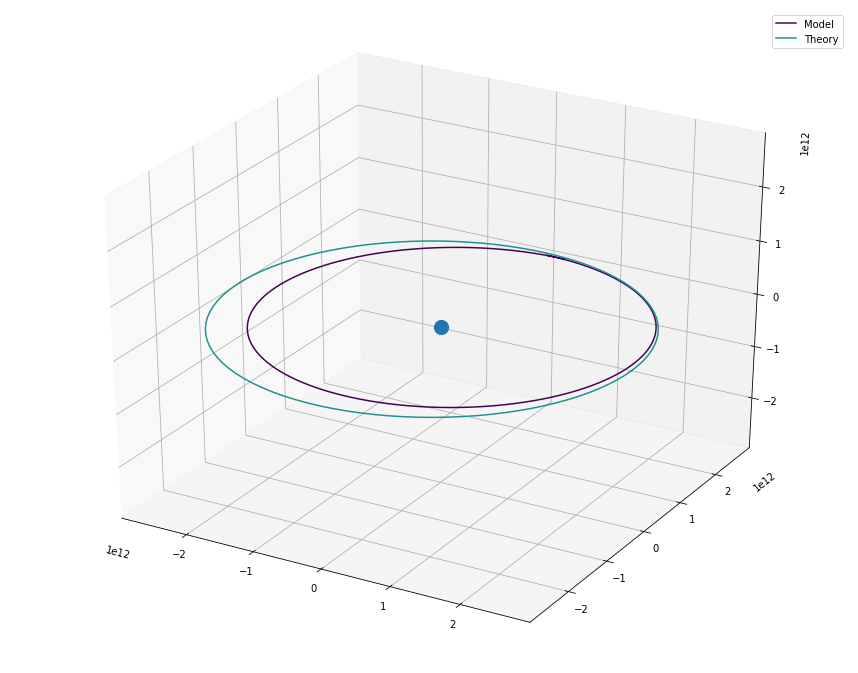

In [326]:
draw_data = get_data_for_planet('Uranus', 2300000)

plot_output(draw_data)

In [327]:
planet1 = pd.read_excel("MovementData/uranusf1.xlsx", names=['dist', 'speed']).values * 1e3

In [328]:
planet2 = pd.read_excel("MovementData/uranusf2.xlsx", names=['dist', 'speed']).values * 1e3

In [329]:
planet_raw = np.concatenate([planet1, planet2])

In [330]:
res1, res2 = measure_quality(draw_data['Theory'], planet_raw[:, 0])

th1 = np.abs(res1).mean()
th2 = np.abs(res2).mean()

res1, res2 = measure_quality(draw_data['Model'], planet_raw[:, 0])

mod1 = np.abs(res1).mean()
mod2 = np.abs(res2).mean()

print('Theory divergence: ', min([th1, th2]))
print('Model divergence: ', min([mod1, mod2]))

Theory divergence:  0.02180793594146946
Model divergence:  0.05337372121199383
